## Clustering

In [2]:
import math, matplotlib.pyplot as plt, operator, torch
from functools import partial

In [3]:
torch.manual_seed(42)
torch.set_printoptions(precision=3,linewidth=140, sci_mode=False)

## Create Data

In [4]:
n_clusters =6
n_samples = 250

In [5]:
centroids = torch.rand(n_clusters, 2)* 70-35

In [6]:
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

In [7]:
def sample(m): return MultivariateNormal(m, torch.diag(tensor([5.,5.]))).sample((n_samples,))

In [8]:
slices = [sample(c) for c in centroids]
data = torch.cat(slices)
data.shape

torch.Size([1500, 2])

In [9]:
def plot_data(centroids, data, n_samples, ax=None):
    if ax is None: _,ax = plt.subplots()
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        ax.scatter(samples[:,0], samples[:,1], s=1)
        ax.plot(*centroid, markersize=10, marker="x", color='k', mew=5)
        ax.plot(*centroid, markersize=5, marker="x", color='m', mew=2)

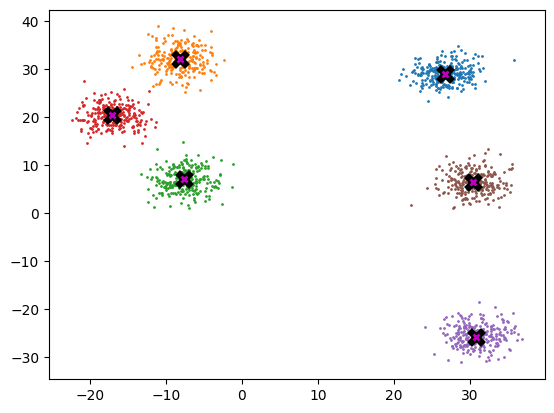

In [10]:
plot_data(centroids, data, n_samples)

## Mean Shift
Most people that have come across clustering algorithms have learnt about k-means. Mean shift clustering is a newer and less well-known approach, but it has some important advantages:

It doesn't require selecting the number of clusters in advance, but instead just requires a bandwidth to be specified, which can be easily chosen automatically
It can handle clusters of any shape, whereas k-means (without using special extensions) requires that clusters be roughly ball shaped.

In [11]:
midp = data.mean(0)
midp

tensor([ 9.222, 11.604])

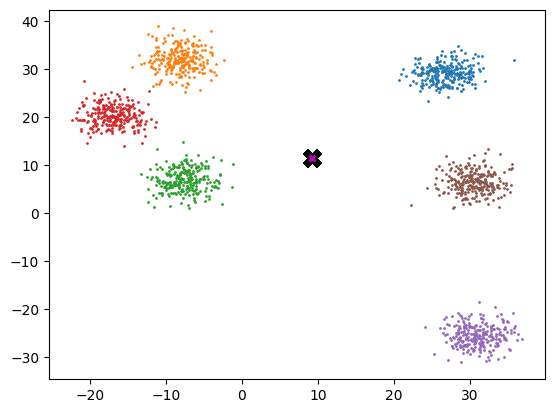

In [13]:
plot_data([midp]*6, data, n_samples)

#### What is Gaussian Kernel or known as normal distribution
{f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}

In [14]:
def gaussion(d, bw): return torch.exp(-0.5*((d/bw))**2) / (bw* math.sqrt(2*math.pi))

In [15]:
def plot_func(f):
  x = torch.linspace(0,10,100)
  plt.plot(x,f(x))

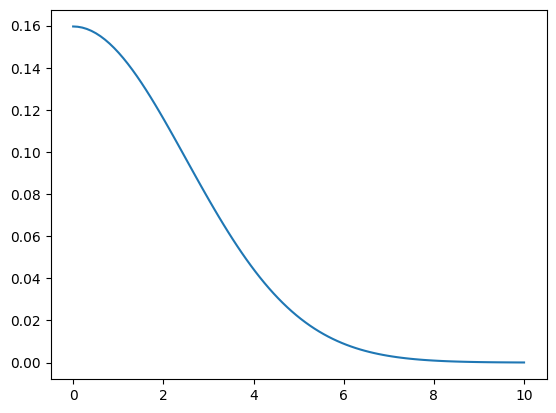

In [16]:
plot_func(partial(gaussion,bw=2.5))